# Conway's Game of Life in NumPy


Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2022](https://github.com/escape2020/school2022) The implementation in this notebook is inspired by Nicolas Rougier.

![ConwaysGameOfLife](https://conwaylife.com/w/images/0/0d/Conwaylife.gif)

[Conway's Game of Life](
https://conwaylife.com/wiki/Conway%27s_Game_of_Life) is a zero-player game and a lot of fun. It's all about birth, death and survival. The game consists of a 2-dimensional board and starts with a random state. The next generation (frame) is calculated using the following four rules:

1. Any live cell with fewer than two live neighbours dies (referred to as underpopulation or exposure[1]).
2. Any live cell with more than three live neighbours dies (referred to as overpopulation or overcrowding).
3. Any live cell with two or three live neighbours lives, unchanged, to the next generation.
4. Any dead cell with exactly three live neighbours will come to life.

Start with a small board, e.g. `5x5` using `NumPy`:

    rng = np.random.default_rng(62)
    G = rng.integers(0, 2, (5,5))
    
and figure out how to calculate the frame of the next generation. You can use `plt.imshow()` from `Matplotlib` to visualise the board.

Bonus: create a function called `iterate(G)` which returns the next generation's frame and try `from matplotlib.animation import FuncAnimation` to create an animation with `Matplotlib`.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

print(f"Python version:  {sys.version}\n"
      f"NumPy version:   {np.__version__}")

Python version:  3.9.12 (main, Mar 26 2022, 15:44:31) 
[Clang 13.1.6 (clang-1316.0.21.2)]
NumPy version:   1.22.4


### Let's create a small 5x5 board

In [2]:
rng = np.random.default_rng(62)  # initialise our random number generator

G = rng.integers(0, 2, (5,5))
G

array([[0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0]])

We exploit that the board is has binary elements which can be added together to count the neighbours by shifting it in each of the eight directions.
For simplicity, the outer elements are not taken into account and are discarded after the first generation.

The following three "kernels" represent the top left, top mid and top right sectors, each with the shape `(n-1, n-1)` compared to the original `(n, n)` board.

In [3]:
G[0:-2,0:-2]  # top left 3x3 section

array([[0, 1, 1],
       [1, 0, 0],
       [1, 1, 0]])

In [4]:
G[0:-2,1:-1]  # top mid 3x3 section

array([[1, 1, 1],
       [0, 0, 0],
       [1, 0, 1]])

In [5]:
G[0:-2,2:]  # top right 3x3 section

array([[1, 1, 1],
       [0, 0, 1],
       [0, 1, 1]])

### Summing them up will result in a board which shows the number of top neighbours for each cell in the middle `3x3` part of the board:

In [6]:
G[0:-2,0:-2] + G[0:-2,1:-1] + G[0:-2,2:]  # summing them up to count the top neighbours

array([[2, 3, 3],
       [1, 0, 1],
       [2, 2, 2]])

### Let's count all eight possible neighbours:

In [7]:
n = (G[0:-2,0:-2] + G[0:-2,1:-1] + G[0:-2,2:] +
     G[1:-1,0:-2]                + G[1:-1,2:] +
     G[2:  ,0:-2] + G[2:  ,1:-1] + G[2:  ,2:])
n

array([[5, 5, 6],
       [4, 3, 3],
       [6, 4, 4]])

### New cells are born if they have exactly three neighbours (rule 4):

In [8]:
births = (G[1:-1, 1:-1]==0) & (n==3)
births

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

### Cells survive if they have two or three neighbours (rule 3):

In [9]:
survivors = (G[1:-1, 1:-1] == 1) & ((n == 2) | (n == 3))
survivors

array([[False, False, False],
       [False, False,  True],
       [False, False, False]])

### Final state of the next generation:

In [10]:
G_next = np.zeros_like(G)
G_next[1:-1,1:-1][births | survivors] = 1
G_next

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

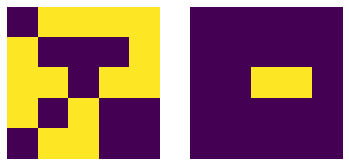

In [11]:
fig, axes = plt.subplots(1, 2)
for ax, data in zip(axes, (G, G_next)):
    ax.imshow(data)
    ax.set_axis_off()

## Let's put everything together

In [12]:
rng = np.random.default_rng(23)

G = rng.integers(0, 2, (10, 10))

def iterate(G):
    n = (G[0:-2,0:-2] + G[0:-2,1:-1] + G[0:-2,2:] +
         G[1:-1,0:-2]                + G[1:-1,2:] +
         G[2:  ,0:-2] + G[2:  ,1:-1] + G[2:  ,2:])

    survivors = (G[1:-1, 1:-1] == 1) & ((n == 2) | (n == 3))
    births = (G[1:-1, 1:-1]==0) & (n==3)
    
    G[...] = 0  # clear the board
    G[1:-1, 1:-1][survivors | births] = 1
    
    return G

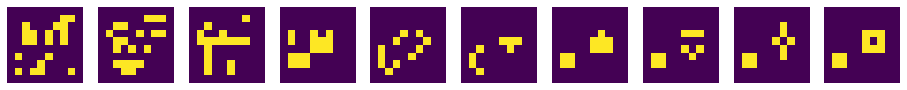

In [13]:
steps = 10
fig, axes = plt.subplots(1, steps, figsize=(16, 4))
for ax in axes:
    ax.imshow(iterate(G))
    ax.set_axis_off()

## Animated Plot

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


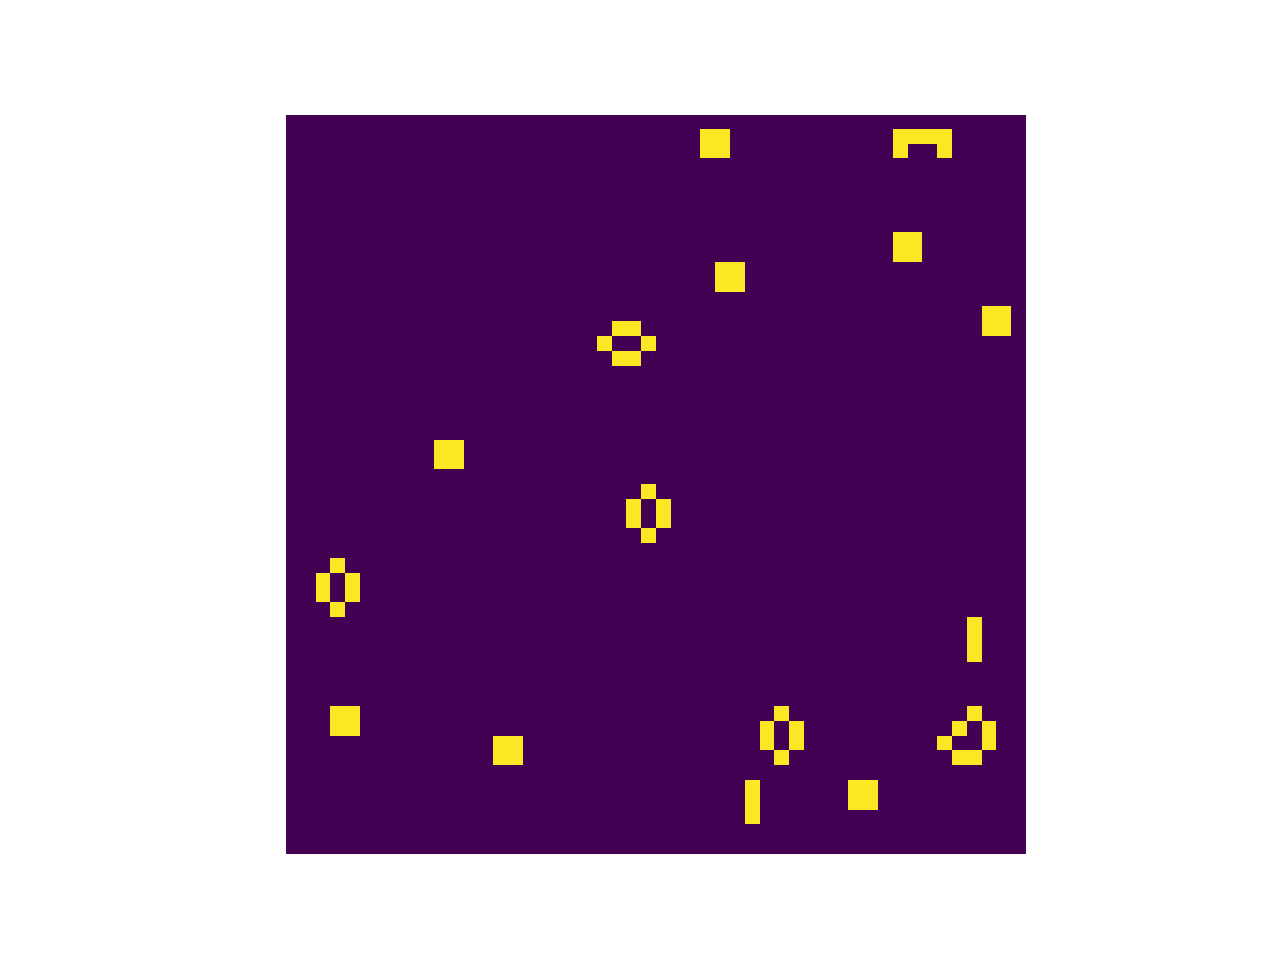

In [15]:
rng = np.random.default_rng(23)
G = rng.integers(0, 2, (50, 50))

fig, ax = plt.subplots()
image = ax.imshow(G)
ax.set_axis_off()

def update(frame):
    image.set_data(iterate(G))
    return image

FuncAnimation(fig, update, frames=np.arange(1000))
plt.axis('off');